In [162]:
#In this project we are going to to identify segments of customers for targetted marketing and Visualize 

<font size="6">Data Description</font>

In [163]:
# Importing necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import seaborn as sns
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

In [164]:
# Importing the dataset mallcustomer.csv using Pandas library
df = pd.read_csv('Mall_Customers.csv')

#Now let us look at the head of the dataframe
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [165]:
#Let us rename the columns into more readable form
df.rename(columns={"Annual Income (k$)":"AIncome","Spending Score (1-100)":"Score"},inplace=True)

In [166]:
df

,CustomerID,Gender,Age,AIncome,Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [167]:
#Let us see the dimentionality of the dataframe
df.shape

(200, 5)

<font size="6">Data Preprocessing</font>

In [168]:
#checking the information of the datset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   CustomerID  200 non-null    int64 
 1   Gender      200 non-null    object
 2   Age         200 non-null    int64 
 3   AIncome     200 non-null    int64 
 4   Score       200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [169]:
df.describe()

,CustomerID,Age,AIncome,Score
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [170]:
# Now we will look at the NULL values present in our data

df.isnull().sum()

CustomerID    0
Gender        0
Age           0
AIncome       0
Score         0
dtype: int64

In [171]:
#we do not have any null values in our data set

## Exploratory Data Analysis

In [172]:
#Let us find the number of observations in each category of the feature ‘Gender’ using countplot()
#Gender

C:\Users\itsme\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='Gender', ylabel='count'>

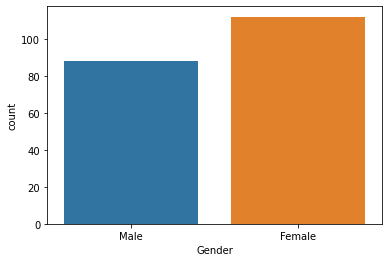

In [173]:
sns.countplot(df['Gender'])

In [174]:
# There are more females in the dataset when compared to the male

In [175]:
# Let us draw the piechart to show the gender distribution across our customers dataset.

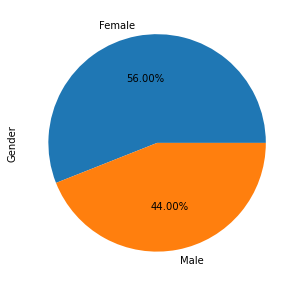

In [176]:
plt.figure(figsize=(8,5))
df.Gender.value_counts().plot.pie( autopct='%.2f%%')
plt.show()

From the above graph, we conclude that the percentage of female is 56%, whereas the percentage of male in our customer dataset is 44%.

In [177]:
# Age

In [178]:
#Let us check the distribution of feature Age using displot

C:\Users\itsme\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='Age', ylabel='Density'>

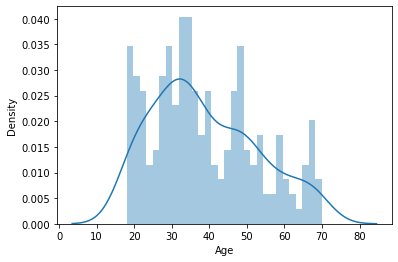

In [179]:
sns.distplot(df['Age'], bins=30)

In [180]:
# It is visible that the age column contains values that are almost normally distributed. The KDE on the distplot looks like a bell curve, meaning the majority of data points of the ‘Age’ column are relatively similar.

In [181]:
# Annual Income
# Now we will explore the annual income feature using a histogram and a density plots to get insights from this feature.

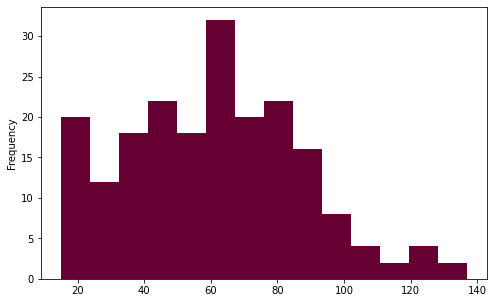

In [182]:
plt.figure(figsize=(8,5))
df['AIncome'].plot.hist(bins=14,color="#660033")
plt.show()

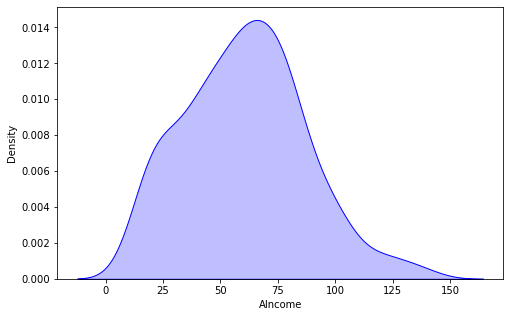

In [183]:
plt.figure(figsize=(8,5))
sns.kdeplot(df['AIncome'], color="blue", shade=True)
plt.show()

In [184]:
#From the above graph
# From the above graphs, we can obviously see that the minimum annual income of the customers is 15 while the maximum income is 137. People earning an average income of 70 have the highest frequency count in our histogram distribution. The average income of all the customers is 60.56.
# In the Kernel Density Plot that we displayed above, we observe that the annual income has a normal distribution.

# Detecting and Handling outliers 

In [185]:
# Now let us see if our given dataset contains any outliers using a boxplot.
# Let us draw the boxplot of Annual income

Text(0.5, 1.0, 'Boxplot of Annual Income')

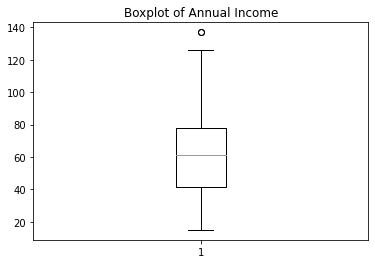

In [186]:
plt.boxplot(df['AIncome'])
plt.title('Boxplot of Annual Income')


In [187]:
#The figure shows that there are a few outliers in the ‘Annual Income’ column. We will handle these outliers using the IQR or the interquartile range method.

In [188]:
Q1=np.percentile(df['AIncome'],25,interpolation='midpoint')
Q2=np.percentile(df['AIncome'],50,interpolation='midpoint')
Q3=np.percentile(df['AIncome'],75,interpolation='midpoint')
IQR=Q3-Q1
lower_limit=Q1-1.5*IQR
upper_limit=Q3+1.5*IQR
outlier=[]
for x in df['AIncome']:
    if((x>upper_limit)or(x<lower_limit)):
        outlier.append(x)

In [189]:
# The outliers were found to be [137,137], both of which are above the upper limit. We will now find the respective indices and drop the entire two rows from the analysis.

In [190]:
outlier_index=df['AIncome']>upper_limit
df.loc[outlier_index].index

Int64Index([198, 199], dtype='int64')

In [191]:
df.drop([198, 199],inplace=True)

Text(0.5, 1.0, 'Boxplot of Annual Income after removing outliers')

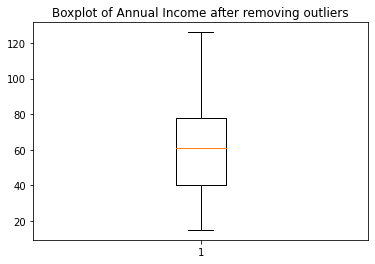

In [192]:
plt.boxplot(df['AIncome'])
plt.title('Boxplot of Annual Income after removing outliers')


<AxesSubplot:>

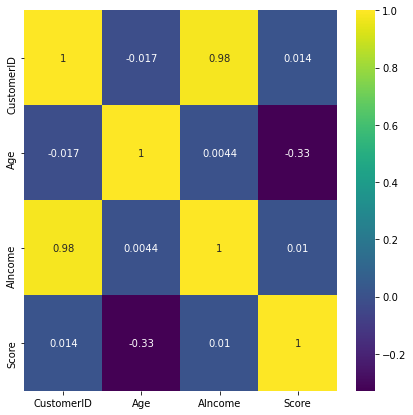

In [193]:
#Let us do correlation between variables and visualize correlation matrices in heatmaps

fig_dims = (7, 7)
fig, ax = plt.subplots(figsize=fig_dims)
sns.heatmap(df.corr(), annot=True, cmap='viridis')

In [194]:
# We see that ‘Age’ is negatively correlated with ‘Spending Score’.
# ‘Annual Income’ is very less correlated with ‘Age’
# ‘Annual Income’ and ‘Spending Score’ are also very less correlated.
# ‘Gender’ is very less correlated with ‘Spending Score’ but more correlated, when compared to ‘Annual Income’.

In [195]:
# scatter plot can be performed only on numerical datatypes so let us convert our categorical feature gender into numerical datatype 

In [196]:
# let us convert the categorical features
gender= {'Male':0, 'Female':1}
df['Gender']= df['Gender'].map(gender)

In [197]:
df.head()

,CustomerID,Gender,Age,AIncome,Score
0,1,0,19,15,39
1,2,0,21,15,81
2,3,1,20,16,6
3,4,1,23,16,77
4,5,1,31,17,40


In [198]:
#A scatter plot is an important visualization method used to observe the relationship between variables. It uses dots to represent values for two different numeric variables.

In [199]:
#Scatter plot between ‘Age’ and ‘Spending Score’

Text(0.5, 1.0, 'Scatter plot between Age and Spending Score')

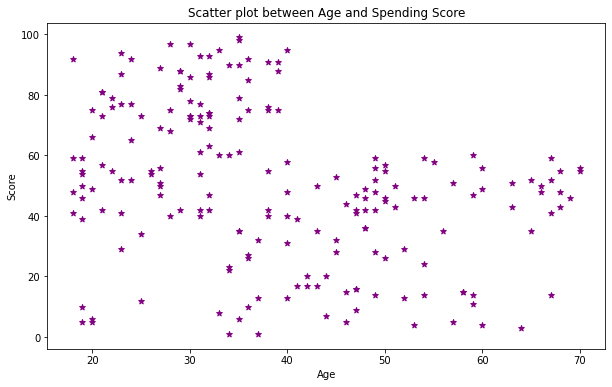

In [200]:
plt.figure(figsize=(10,6))
plt.scatter(df['Age'],df['Score'], marker='*',color = "purple");
plt.xlabel('Age')
plt.ylabel('Score')
plt.title('Scatter plot between Age and Spending Score')

In [201]:
# We can see that the lower the age higher the spending score.

In [202]:
#Scatter plot between ‘Age’ and ‘Annual Income’

Text(0.5, 1.0, 'Scatter plot between Age and Annual Income')

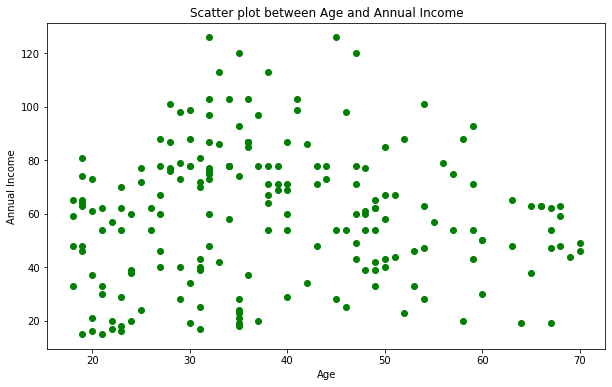

In [203]:
plt.figure(figsize=(10,6))
plt.scatter(df['Age'],df['AIncome'], marker='o',color = "green");
plt.xlabel('Age')
plt.ylabel('Annual Income')
plt.title('Scatter plot between Age and Annual Income')

In [204]:
# From the above graph People between the age group of 30–50 years get the highest annual income.

In [205]:
#Scatter plot between ‘Annual Income’ and ‘Spending Score’

Text(0.5, 1.0, 'Scatter plot between Annual Income and Spending Score')

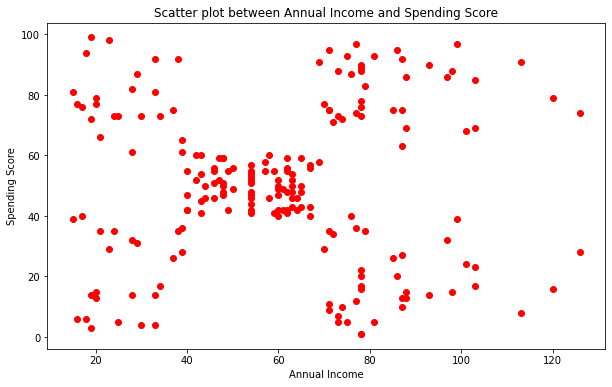

In [206]:
plt.figure(figsize=(10,6))
plt.scatter(df['AIncome'],df['Score'], marker='o',color = "red");
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('Scatter plot between Annual Income and Spending Score')

In [207]:
#We can see that roughly Annual income of $40–70k corresponds to a 40–60 spending score.

In [208]:
#Standardizing the variables
#Before deploy the model we will have to standardize all variables in the dataset to get them around the same scale.

In [209]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[['Age', 'AIncome', 'Score']])

In [210]:
df.head()

,CustomerID,Gender,Age,AIncome,Score
0,1,0,19,15,39
1,2,0,21,15,81
2,3,1,20,16,6
3,4,1,23,16,77
4,5,1,31,17,40


# Building the Clustering model

In [211]:
#Let us apply k-means algorithm

#create a copy of the data variable
x = df.copy()
# The number in the brackets is K, or the number of clusters we are aiming for, here we take 3 randomly
kmeans = KMeans(3)
# Fit the data
kmeans.fit(x)

KMeans(n_clusters=3)

In [212]:
# Create a copy of the input data
clusters = x.copy()
# Take note of the predicted clusters 
clusters['cluster_pred']=kmeans.fit_predict(x)

Text(0, 0.5, 'Spending Score')

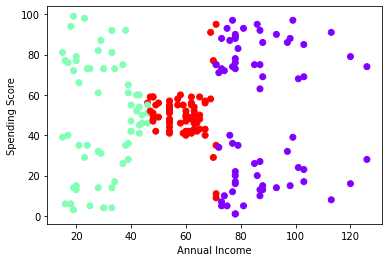

In [213]:
# Plot the data using the Annual Income and the Spending Score
plt.scatter(clusters['AIncome'],clusters['Score'],c=clusters['cluster_pred'],cmap='rainbow')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')

In [214]:
#The above scatter plot gives us a rough idea of the optimal number of clusters. But to find the most appropriate ‘K’, we use The Elbow Method.

# ELBOW METHOD

In [215]:
wcss=[]
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 42)
    kmeans.fit(x)
    wcss_iter=kmeans.inertia_
    wcss.append(wcss_iter)

C:\Users\itsme\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



Text(0, 0.5, 'within Clusters Sum of Squares(WCSS)')

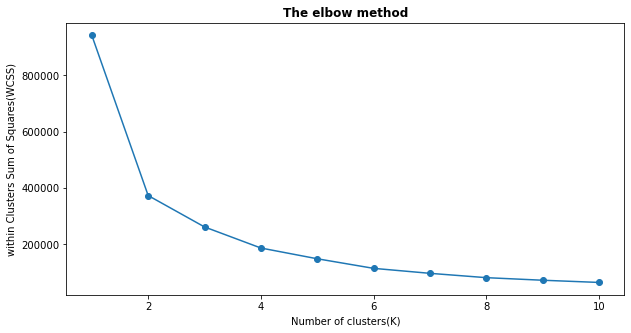

In [216]:
# Plotting the results onto a line graph to help us observe 'The Elbow'
plt.figure(figsize=(10,5))
no_clusters=range(1,11)
plt.plot(no_clusters, wcss,marker = "o")
plt.title('The elbow method', fontweight="bold")
plt.xlabel('Number of clusters(K)')
plt.ylabel('within Clusters Sum of Squares(WCSS)')

In [217]:
#We can see that the optimal number of clusters is 5, the point that which WCSS stops decreasing drastically.
#Now let's look into yet another clustering metric to evaluate

# Silhouette Score

In [218]:
# A silhouette score is a metric used to measure how dense and well separated the clusters are.

In [219]:
# Let's calculate the score for our model:

In [220]:
print(silhouette_score(clusters, kmeans.labels_, metric='euclidean'))

0.3949337787973377


In [221]:
#The silhouette score for the model is 0.37 which is a pretty decent value.
#Now we assign the optimal number of clusters as 5 and create a new data frame with the predicted clusters. 
#Moreover, we map our categorical feature ‘Gender’ back to its initial categories.

In [222]:
kmeans_new = KMeans(5)
#Fit the data
kmeans_new.fit(x)

#Create a new data frame with the predicted clusters
clusters_new = x.copy()
clusters_new['cluster_pred'] = kmeans_new.fit_predict(x)

#mapping the gender variable back to 'male' and 'female'
gender= {0:'Male',1:'Female'}
clusters_new['Gender']= clusters_new['Gender'].map(gender)

In [223]:
clusters_new

,CustomerID,Gender,Age,AIncome,Score,cluster_pred
0,1,Male,19,15,39,4
1,2,Male,21,15,81,4
2,3,Female,20,16,6,2
3,4,Female,23,16,77,4
4,5,Female,31,17,40,4
...,...,...,...,...,...,...
193,194,Female,38,113,91,1
194,195,Female,47,120,16,3
195,196,Female,35,120,79,1
196,197,Female,45,126,28,3


In [224]:
# To get a more comprehensible understanding of the predicted clusters, let’s visualize:

Text(0, 0.5, 'Spending Score')

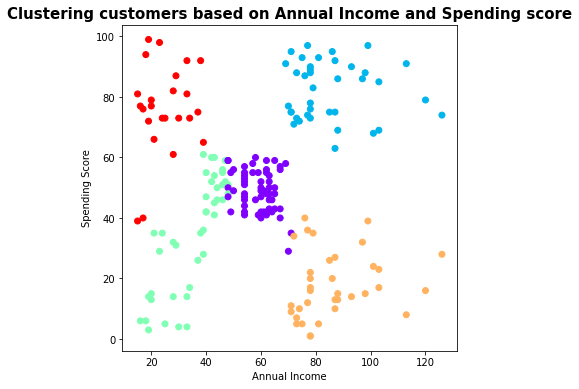

In [225]:
plt.figure(figsize=(6,6))
plt.scatter(clusters_new['AIncome'],clusters_new['Score'],c=clusters_new['cluster_pred'],cmap='rainbow')
plt.title("Clustering customers based on Annual Income and Spending score", fontsize=15,fontweight="bold")
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")

In [226]:
#From the final plot, we can perceive that the customers present in our dataset could be clustered into 5 distinct groups based on their annual income and spending score.
#Red: low annual income, low spending score
#Orange: low annual income, high spending score
#Violet: intermediate annual income, intermediate spending score
#Blue: high annual income, high spending score
#Green: high annual income, low spending score

In [227]:
#To begin with, to study the attributes of each of the clusters, let's find the average of all features across each cluster.

In [228]:
avg_data = clusters_new.groupby(['cluster_pred'], as_index=False).mean()
avg_data

,cluster_pred,CustomerID,Age,AIncome,Score
0,0,96.016949,41.559322,59.050847,49.033898
1,1,161.000000,32.763158,85.210526,82.105263
2,2,40.452381,46.857143,35.476190,35.119048
3,3,163.000000,41.057143,86.514286,17.885714
4,4,21.416667,25.250000,24.916667,76.041667


In [229]:
#So, let’s visualize the above table using bar graphs.

<AxesSubplot:xlabel='cluster_pred', ylabel='Age'>

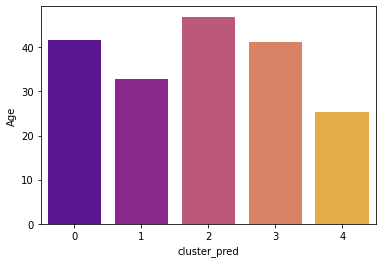

In [230]:
sns.barplot(x='cluster_pred',y='Age',palette="plasma",data=avg_data)


<AxesSubplot:xlabel='cluster_pred', ylabel='AIncome'>

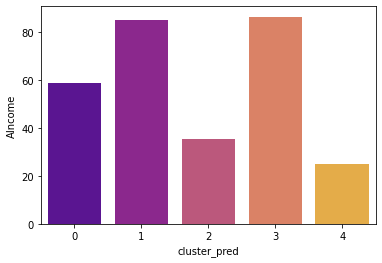

In [231]:
sns.barplot(x='cluster_pred',y='AIncome',palette="plasma",data=avg_data)


<AxesSubplot:xlabel='cluster_pred', ylabel='Score'>

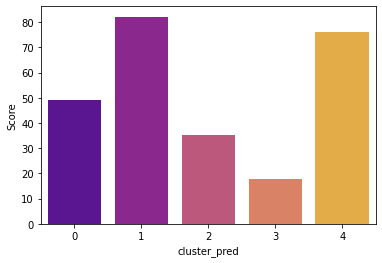

In [232]:
sns.barplot(x='cluster_pred',y='Score',palette="plasma",data=avg_data)

In [233]:
# Gender breakdown
#We also need to understand the gender divide of each cluster

In [234]:
data2 = pd.DataFrame(clusters_new.groupby(['cluster_pred','Gender'])['Gender'].count())
data2

Gender
cluster_pred Gender        
0            Female      34
             Male        25
1            Female      21
             Male        17
2            Female      26
             Male        16
3            Female      17
             Male        18
4            Female      14
             Male        10

#Clusters 0,1,2,3 have a higher proportion of females than males and cluster 4 has an almost equal proportion of both.

In [235]:
import plotly.express as px
px.bar(data_frame=clusters_new, x='cluster_pred',y='Score')


In [242]:
px.bar(data_frame=clusters_new, x='cluster_pred',y="CustomerID")


In [243]:
px.bar(data_frame=clusters_new, x='cluster_pred',y='AIncome')


Blue cluster- high annual income, high spending score
The average age is 32 years; predominantly female; Average Annual Income is 85k in dollars; Average Spending Score is 82

Violet cluster-intermediate annual income, intermediate spending score
The average age is 43 years; predominantly female; Average Annual Income is 55k in dollars; Average Spending Score is 49

Red cluster- low annual income, low spending score
The average age is 45 years; predominantly female; Average Annual Income is 26k in dollars; Average Spending Score is 21

Green cluster- high annual income, low spending score
The average age is 41 years; there is an almost equal proportion of males and females; Average Annual Income is 86k in dollars; Average Spending Score is 17